# ***MACHINE LEARNING***

## *ÍNDICE:* 
---
0. INTRODUCCIÓN
1. ANÁLISIS EXPLORATORIO DE DATOS (EDA)
    - 1.1. Acondicionamiento bases de datos
    - 1.2. Análisis visual
    - 1.3. Análisis estadístico  
2. **MACHINE LEARNING**
    - [2.1. Preparación y limpieza de datos](#21)
    - [2.2. Feature Engineering](#22)
    - [2.3. Modelado](#23)
3. RESULTADOS
    - 3.1. Visualización y reporting de los resultados
    - 3.2. Creación de un pipeline para el flujo automatizado
---

##  **2.1. Preparación y limpieza de datos**<a id='21'></a>

In [1]:
# Libreria
from utils.libreries import *

%matplotlib inline 
import warnings

warnings.filterwarnings("ignore")


# Definicion variables y constantes
PREROOT = os.getcwd()

target = 'Churn'

# Leer csv
df=pd.read_csv(PREROOT+'/data/raw/client_dataset.csv',sep=';')
df_train = pd.read_csv(PREROOT+'/data/raw/training_set/df_train.csv')
df_validation = pd.read_csv(PREROOT+'/data/raw/training_set/df_validation.csv')
df.head()

,idClient,Score,CountryLocation,Gender,Age,Tenure,Games Balance,NumOfProducts,HasPremiumAccess,IsActiveMember,Cumulative score,Churn
0,1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   idClient          10000 non-null  int64  
 1   Score             10000 non-null  int64  
 2   CountryLocation   10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Games Balance     10000 non-null  float64
 7   NumOfProducts     10000 non-null  int64  
 8   HasPremiumAccess  10000 non-null  int64  
 9   IsActiveMember    10000 non-null  int64  
 10  Cumulative score  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [3]:
df_train.head()

,idClient,Score,CountryLocation,Gender,Age,Tenure,Games Balance,NumOfProducts,HasPremiumAccess,IsActiveMember,Cumulative score,Churn
0,2112,642,France,Male,25,7,0.00,2,1,0,102083.78,0
1,2193,845,France,Male,33,8,164385.53,1,1,0,150664.97,0
2,5350,684,Germany,Male,32,3,102630.13,2,1,1,127433.47,0
3,8255,637,Germany,Male,28,3,123675.69,1,1,1,166458.41,0
4,7422,634,Spain,Female,36,1,0.00,1,1,1,143960.72,0


In [4]:
df_validation.head()

,idClient,Score,CountryLocation,Gender,Age,Tenure,Games Balance,NumOfProducts,HasPremiumAccess,IsActiveMember,Cumulative score,Churn
0,5661,706,Spain,Male,68,4,114386.85,1,1,1,28601.68,0
1,9541,727,Germany,Male,46,3,115248.11,4,1,0,130752.01,1
2,9842,567,Germany,Female,46,1,68238.51,2,1,1,109572.58,0
3,5246,717,France,Male,38,7,0.00,2,1,1,158580.05,0
4,3493,655,France,Female,45,7,57327.04,1,0,1,47349.00,0


In [5]:
encoder = LabelEncoder()
df_train_encoded = label_encode_columns(df_train,encoder=encoder) 

##  **2.2. Feature Engineering**<a id='22'></a>

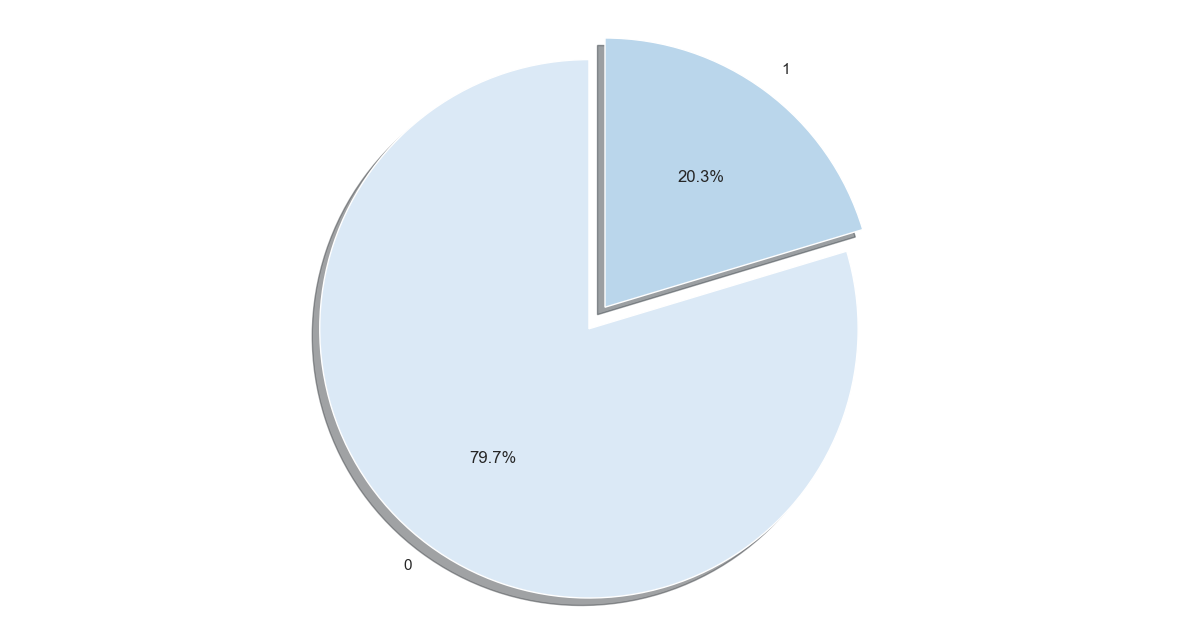

In [6]:
sns.set(rc={'figure.figsize':(15, 8)})
colors = sns.color_palette("Blues")

labels = df_train_encoded[target].value_counts().index
sizes = df_train_encoded[target].value_counts()
explode = (0, 0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels,colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.show()

<Axes: xlabel='Churn', ylabel='count'>

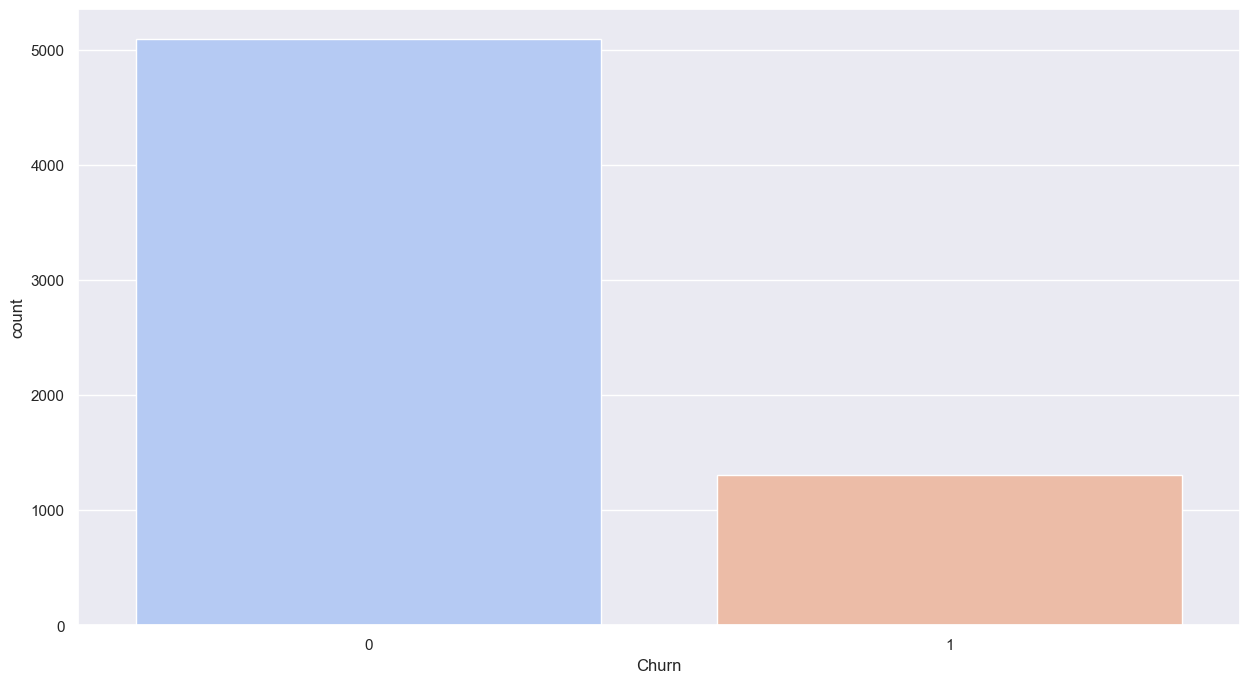

In [7]:
sns.set(rc={'figure.figsize':(15, 8)})
sns.countplot(x=target,data=df_train_encoded,palette="coolwarm")

**Observaciones:**

- Dataset desbalanceado

**Propuestas:**

Al tener un dataset desbalanceado se buscan una serie de opciones, en este caso, suponiendo que no se puedan obtener más datos que equilibren nuestro dataset se plantean las siguientes opciones.
- Opciones para *balancear la data*:

    - Oversampling.
    - Undersampling.
    - Métodos mixtos.

Se puede apreciar visualmente a continuación: 

<img src="https://miro.medium.com/max/1400/1*o_KfyMzF7LITK2DlYm_wHw.png" alt="drawing" width="450x500"/>
<img src="https://miro.medium.com/max/1400/1*gHW_PLz7kWrhdl5t1sJRRA.png" alt="drawing" width="450x500"/>
  

En este notebook se pretende tratar los datos para mejorar los modelos que se han comprobado mejores en el notebook anterior `2a_ML_Baseline.ipynb`. 

Se crean dos dataset procesados:
1. Se seleccionan las variables indepedientes más influyentes mediante los métodos no supervisado de **PCA** y **RFE**.
2. Se balancean las variables utilizando el método de resampling: 

    2.1. Oversampling : **SMOTE**

    2.2. Combinación de under y oversampling: **SMOTEENN**
    
    2.3. Selección del método que se considere mejor.

In [8]:
X_train = df_train_encoded.drop(columns=[target,'idClient'])
y_train = df_train_encoded[target]

X_val = df_validation.drop(columns=[target,'idClient'])
y_val = df_validation[target]
X_val = label_encode_columns(X_val,encoder=encoder) 

***Features selection:***

---

In [9]:
selector = RFE(DecisionTreeClassifier(), n_features_to_select=7, step=1)
selector = selector.fit(X_train, y_train)

In [10]:
selector.support_

array([ True, False, False,  True,  True,  True,  True, False,  True,
        True])

In [11]:
selector.ranking_

array([1, 2, 3, 1, 1, 1, 1, 4, 1, 1])

In [12]:
selector.feature_names_in_

array(['Score', 'CountryLocation', 'Gender', 'Age', 'Tenure',
       'Games Balance', 'NumOfProducts', 'HasPremiumAccess',
       'IsActiveMember', 'Cumulative score'], dtype=object)

In [13]:
selector.n_features_to_select

7

In [14]:
df_fselected = df_train_encoded.loc[:,selector.get_feature_names_out()]
df_fselected[target] = df_train_encoded[target]
#df_fselected.to_csv(os.getcwd()+'/data/processed/data_featureselected2.csv') # Guardar dataframe con features seleccionadas
df_fselected

,Score,Age,Tenure,Games Balance,NumOfProducts,IsActiveMember,Cumulative score,Churn
0,642,25,7,0.00,2,0,102083.78,0
1,845,33,8,164385.53,1,0,150664.97,0
2,684,32,3,102630.13,2,1,127433.47,0
3,637,28,3,123675.69,1,1,166458.41,0
4,634,36,1,0.00,1,1,143960.72,0
...,...,...,...,...,...,...,...,...
6395,618,56,7,0.00,1,1,142400.27,1
6396,499,60,7,76961.60,2,1,83643.87,0
6397,616,31,3,94263.91,2,0,168895.06,0
6398,850,32,5,0.00,1,1,3830.59,0


Optimal number of features : 7


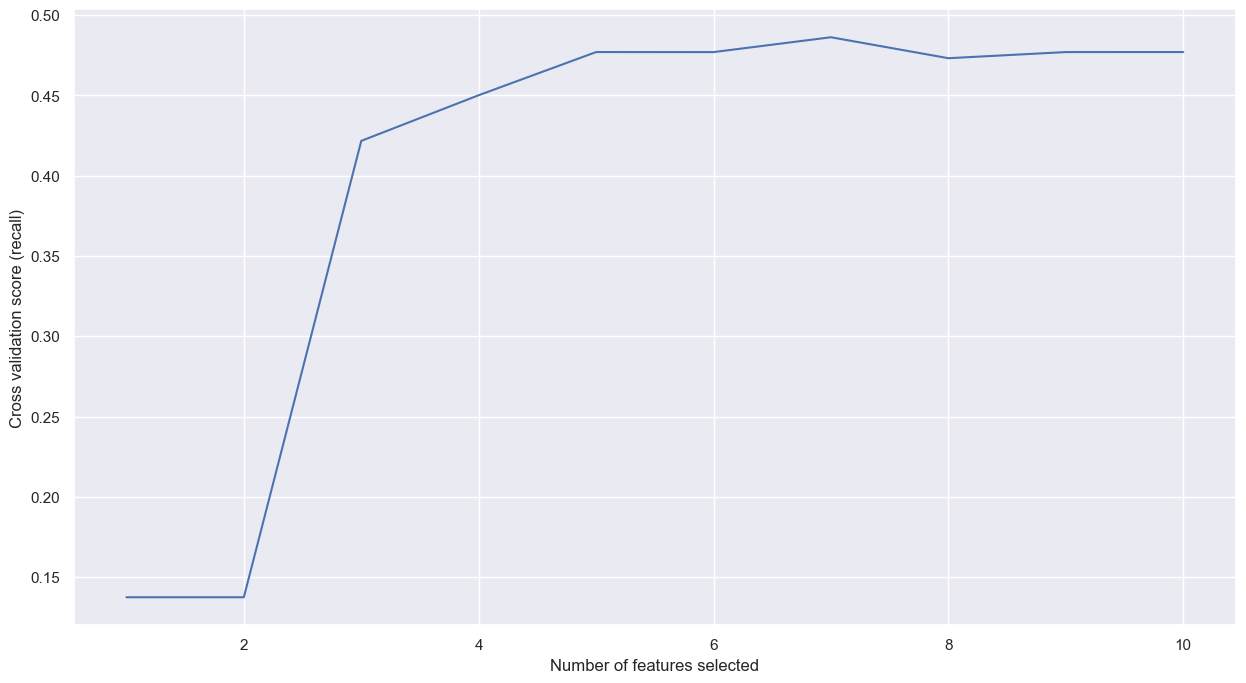

In [15]:

xgboost = XGBClassifier()

min_features_to_select = 1  # Numero minimo de features seleccionadas
rfecv = RFECV(
    estimator=xgboost,
    step=1,
    scoring="recall",
    min_features_to_select=min_features_to_select,
    cv=5  # Numero de particiones
)
rfecv.fit(df_train_encoded.drop(columns=[target,'idClient']), df_train_encoded[target])

print("Optimal number of features : %d" % rfecv.n_features_)

# Grafica recall de las particiones
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (recall)")
plt.plot(
    range(min_features_to_select, len(rfecv.cv_results_["mean_test_score"]) + min_features_to_select),
    rfecv.cv_results_["mean_test_score"]
)
plt.show()


***Balancing data:***

---

*`Dataset completo (sin feature selection)`*


In [16]:
print('Before OverSampling, the shape of train_X: {}'.format(X_train.shape)) 
print('Before OverSampling, the shape of train_y: {} \n'.format(y_train.shape)) 

Before OverSampling, the shape of train_X: (6400, 10)
Before OverSampling, the shape of train_y: (6400,) 



In [17]:
# Apply Oversampling
sm = SMOTE(random_state = 77) 
X_train_SMOTE, y_train_SMOTE = sm.fit_resample(X_train, y_train.ravel()) # type: ignore

<Axes: ylabel='count'>

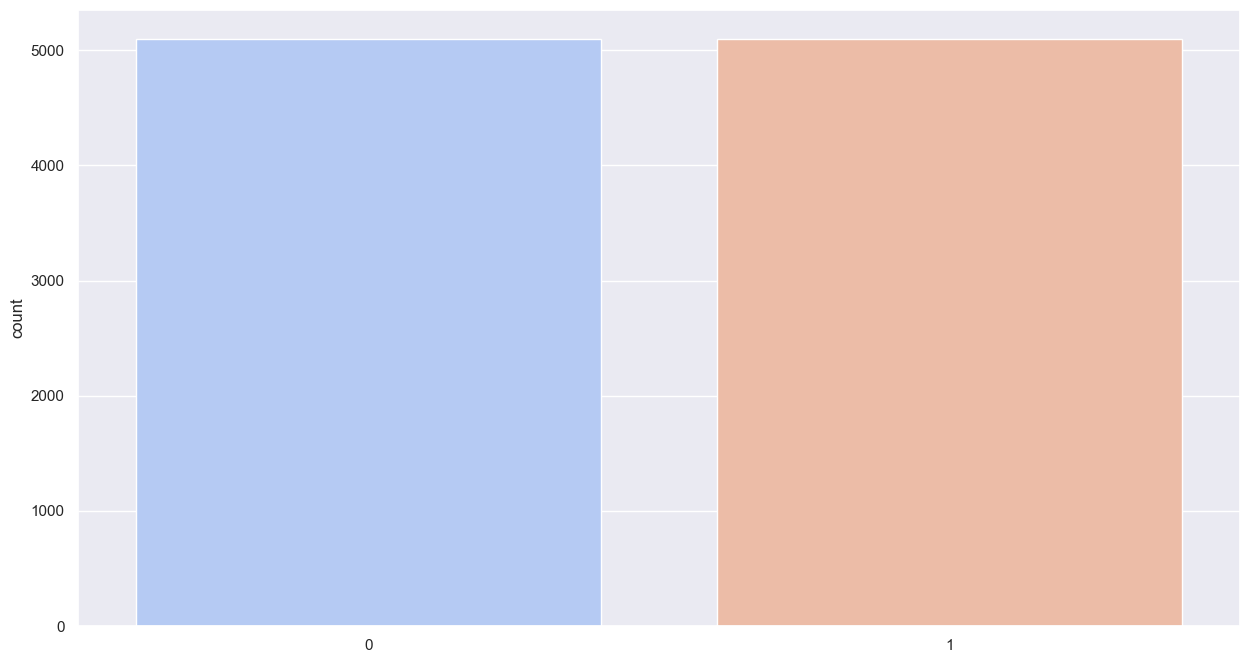

In [18]:
sns.countplot(x=y_train_SMOTE,palette='coolwarm')

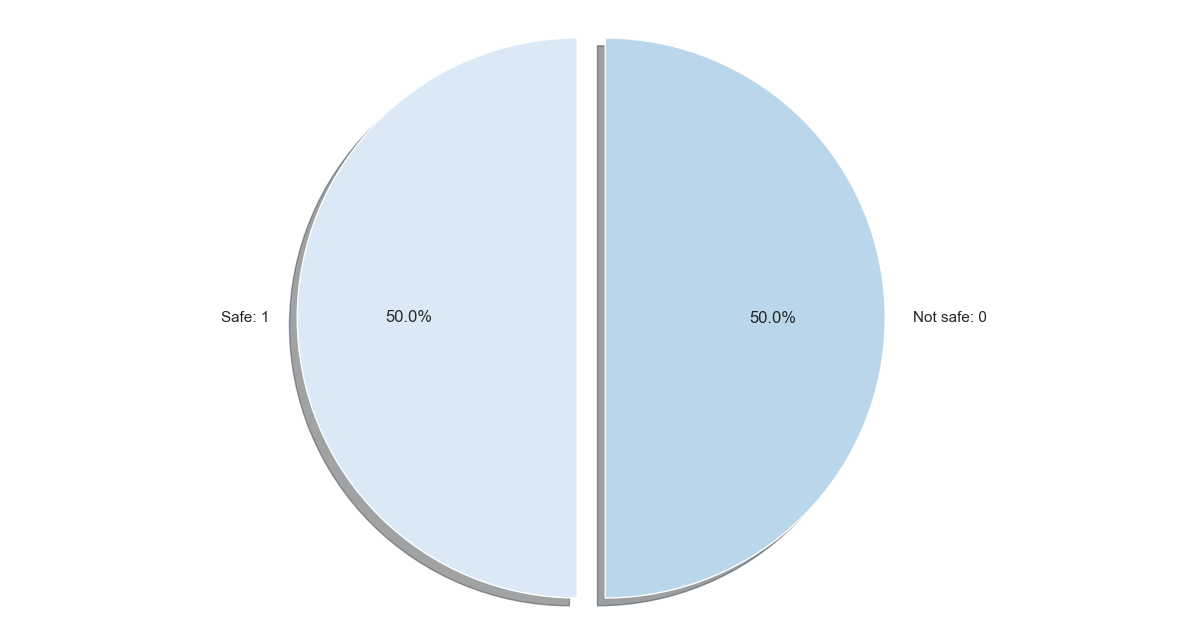

In [19]:
sns.set(rc={'figure.figsize':(15, 8)})
colors = sns.color_palette("Blues")

labels = ['Safe: 1','Not safe: 0']
sizes =  [y_train_SMOTE.sum(),len(y_train_SMOTE)-y_train_SMOTE.sum()]
explode = (0, 0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels,colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.show()

In [20]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_SMOTE.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_SMOTE.shape)) 

After OverSampling, the shape of train_X: (10196, 10)
After OverSampling, the shape of train_y: (10196,) 



In [21]:
# Apply Combining
sm = SMOTEENN(random_state = 77) 
X_train_SMOTEENN, y_train_SMOTEENN = sm.fit_resample(X_train, y_train.ravel()) 

<Axes: ylabel='count'>

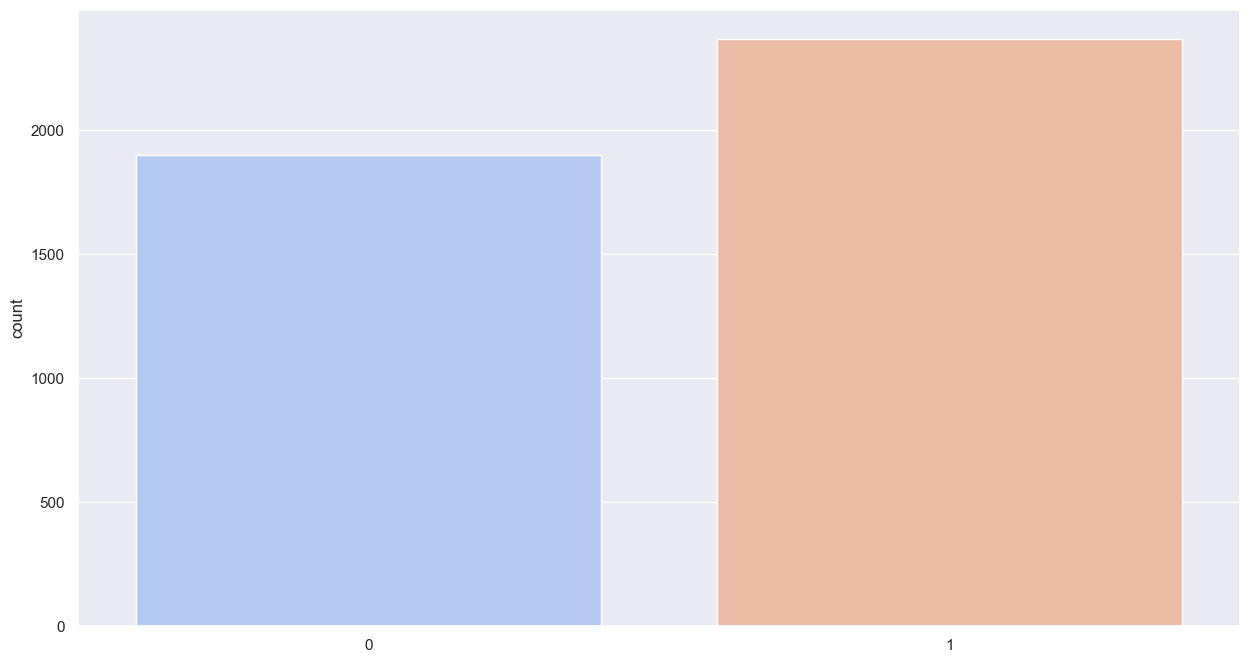

In [22]:
sns.countplot(x=y_train_SMOTEENN,palette='coolwarm')

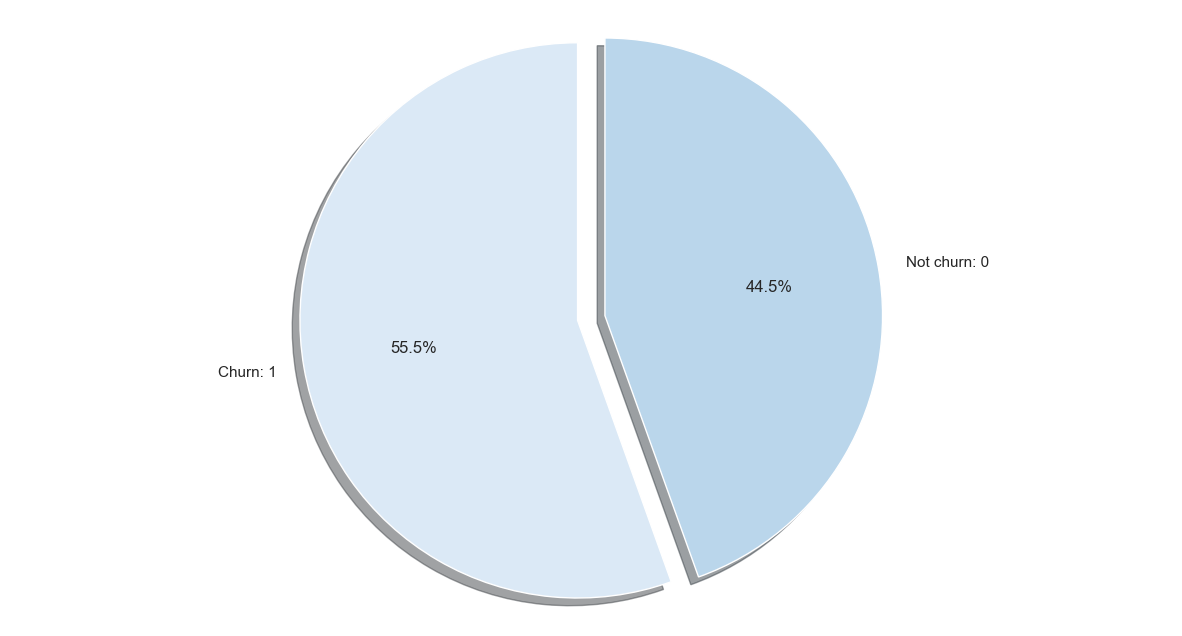

In [23]:
sns.set(rc={'figure.figsize':(15, 8)})
colors = sns.color_palette("Blues")

labels = ['Churn: 1','Not churn: 0']
sizes =  [y_train_SMOTEENN.sum(),len(y_train_SMOTEENN)-y_train_SMOTEENN.sum()]
explode = (0, 0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels,colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.show()

In [24]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_SMOTEENN.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_SMOTEENN.shape)) 

After OverSampling, the shape of train_X: (4265, 10)
After OverSampling, the shape of train_y: (4265,) 



In [25]:
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report

In [26]:

pipe = make_pipeline(StandardScaler(), XGBClassifier())
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1265
           1       0.72      0.44      0.55       335

    accuracy                           0.85      1600
   macro avg       0.79      0.70      0.73      1600
weighted avg       0.84      0.85      0.83      1600



In [27]:
pipe = make_pipeline(StandardScaler(), XGBClassifier())
pipe.fit(X_train_SMOTE,y_train_SMOTE)
y_pred = pipe.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      1265
           1       0.55      0.60      0.57       335

    accuracy                           0.81      1600
   macro avg       0.72      0.73      0.73      1600
weighted avg       0.82      0.81      0.82      1600



In [28]:
pipe = make_pipeline(StandardScaler(), XGBClassifier())
pipe.fit(X_train_SMOTEENN,y_train_SMOTEENN)
y_pred = pipe.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1265
           1       0.48      0.56      0.52       335

    accuracy                           0.78      1600
   macro avg       0.68      0.70      0.69      1600
weighted avg       0.80      0.78      0.79      1600



*`Dataset después del feature selection (7 variables independientes)`*

In [30]:
data_FS = df_fselected.copy()

X_FS = data_FS.drop([target], axis=1)

y_FS = data_FS[target].copy()

X_train_FS, X_test_FS, y_train_FS, y_test_FS = train_test_split(X_FS, y_FS, test_size = 0.2, random_state = 77)

In [31]:
print('Before OverSampling, the shape of train_X: {}'.format(X_train_FS.shape)) 
print('Before OverSampling, the shape of train_y: {} \n'.format(y_train_FS.shape)) 

Before OverSampling, the shape of train_X: (5120, 7)
Before OverSampling, the shape of train_y: (5120,) 



<Axes: ylabel='count'>

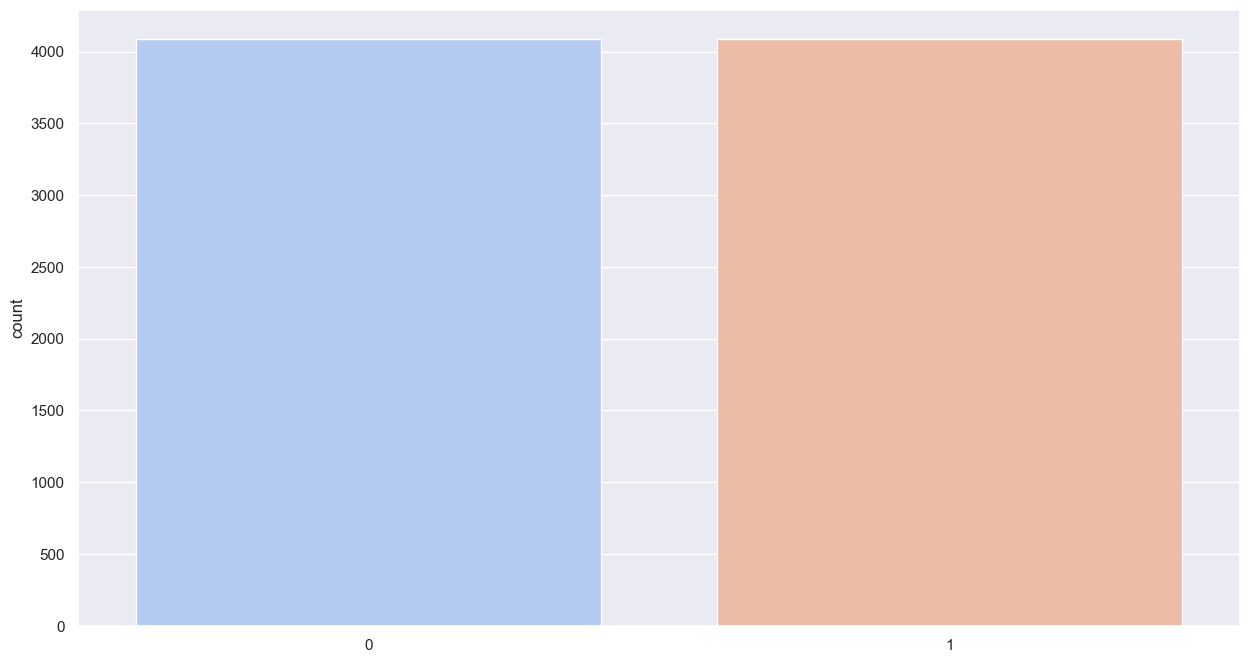

In [32]:
# Apply Oversampling
sm = SMOTE(random_state = 77) 
X_train_FSSMOTE, y_train_FSSMOTE = sm.fit_resample(X_train_FS, y_train_FS.ravel()) 

sns.countplot(x=y_train_FSSMOTE,palette='coolwarm')

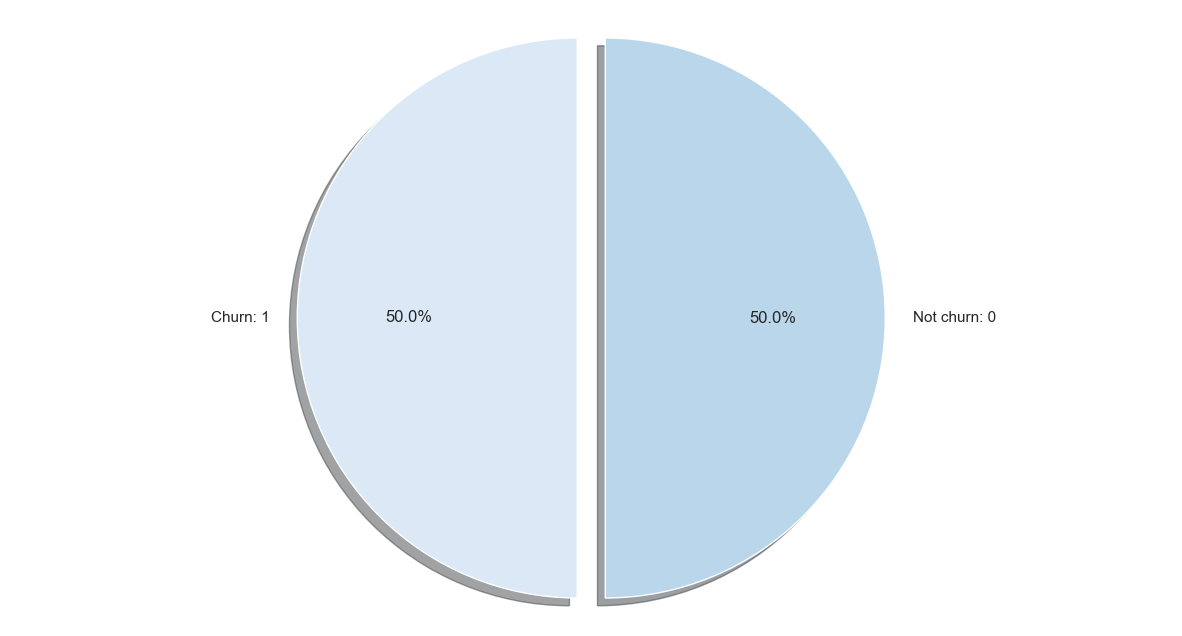

In [33]:
sns.set(rc={'figure.figsize':(15, 8)})
colors = sns.color_palette("Blues")

labels = ['Churn: 1','Not churn: 0']
sizes =  [y_train_FSSMOTE.sum(),len(y_train_FSSMOTE)-y_train_FSSMOTE.sum()]
explode = (0, 0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels,colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.show()

In [34]:
# Apply Combining
sm = SMOTEENN(random_state = 77) 
X_train_FSSMOTEENN, y_train_FSSMOTEENN = sm.fit_resample(X_train_FS, y_train_FS.ravel()) 

<Axes: ylabel='count'>

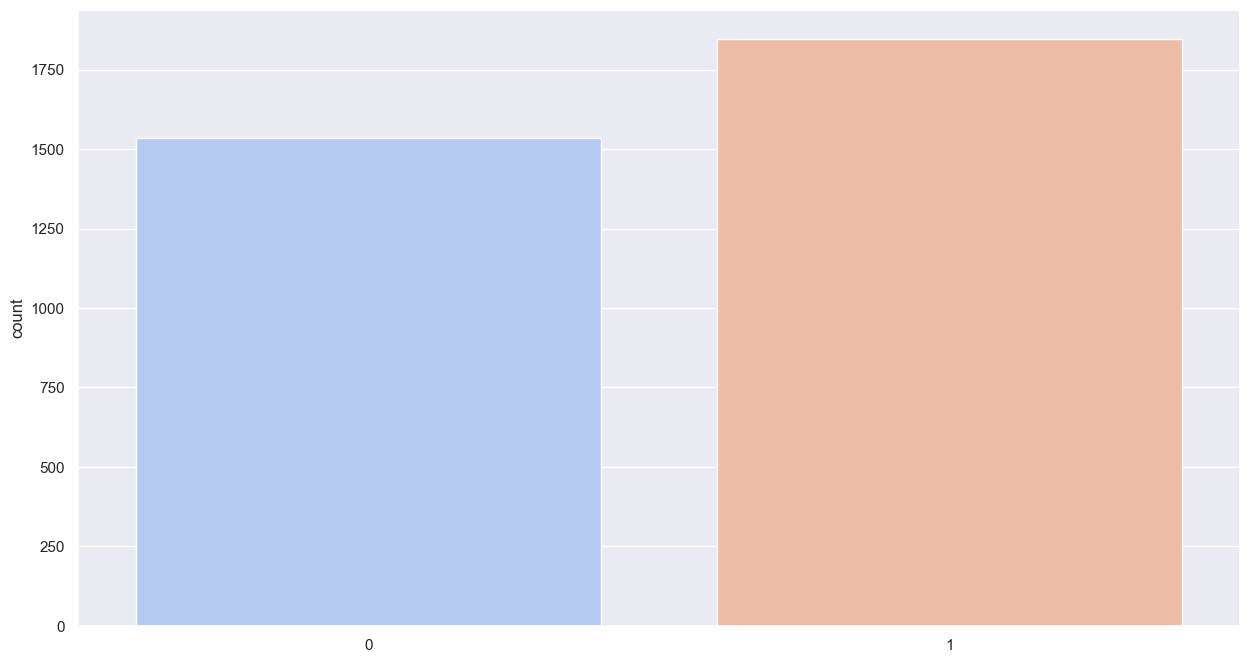

In [35]:
sns.countplot(x=y_train_FSSMOTEENN,palette='coolwarm')

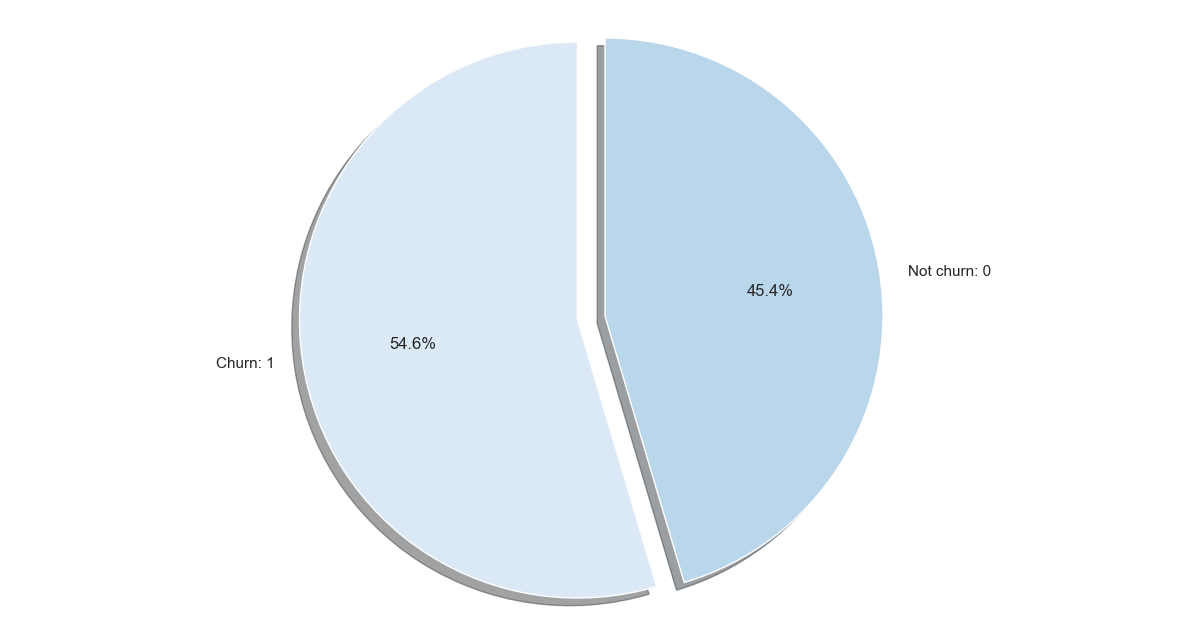

In [36]:
sns.set(rc={'figure.figsize':(15, 8)})
colors = sns.color_palette("Blues")

labels = ['Churn: 1','Not churn: 0']
sizes =  [y_train_FSSMOTEENN.sum(),len(y_train_FSSMOTEENN)-y_train_FSSMOTEENN.sum()]
explode = (0, 0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels,colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.show()

In [37]:

pipe = make_pipeline(StandardScaler(), XGBClassifier())
pipe.fit(X_train_FS,y_train_FS)
y_pred = pipe.predict(X_test_FS)
print(classification_report(y_test_FS, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1011
           1       0.71      0.46      0.56       269

    accuracy                           0.85      1280
   macro avg       0.79      0.71      0.73      1280
weighted avg       0.84      0.85      0.83      1280



In [38]:
pipe = make_pipeline(StandardScaler(), XGBClassifier())
pipe.fit(X_train_FSSMOTE,y_train_FSSMOTE)
y_pred = pipe.predict(X_test_FS)
print(classification_report(y_test_FS, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87      1011
           1       0.51      0.64      0.57       269

    accuracy                           0.80      1280
   macro avg       0.70      0.74      0.72      1280
weighted avg       0.82      0.80      0.80      1280



In [39]:
pipe = make_pipeline(StandardScaler(), XGBClassifier())
pipe.fit(X_train_FSSMOTEENN,y_train_FSSMOTEENN)
y_pred = pipe.predict(X_test_FS)
print(classification_report(y_test_FS, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.81      0.84      1011
           1       0.45      0.61      0.52       269

    accuracy                           0.76      1280
   macro avg       0.67      0.71      0.68      1280
weighted avg       0.79      0.76      0.77      1280



**Observaciones:**

Se puede ver que utilizando como prueba el modelo XGBoostClassifier() las mejores métricas están entre: 

- Dataset balanceado SMOTE con feature selection: mejores métricas de modo general. 
- Dataset balanceado con SMOTE sin la feature selection: mejor recall, sin embargo disminuyen las otras métricas

**Propuesta:**

- Prueba con ajuste de hiperparámetros para confirmar los datos obtenidos de la prueba general.


##  **2.3. Modelado**<a id='23'></a>

## Baseline con feature selection data:

Se realiza la `prueba general de modelos` para ver cual de ellos tiene las mejores métricas ***habiendo realizado feature selection***. Aún sin aplicarle el balanceo ni el ajuste de parámetros.

In [35]:
modelos = choose_models('all',None,clf = True)

for modelo in list(modelos.keys()):
    y_pred, metrics, model = baseline(X_train_FS,y_train_FS, X_test_FS, y_test_FS, base_model = modelos[modelo], clf = True,file_name='baseline_fs_metrics.csv')
    

Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved


In [42]:
saved_metrics = pd.read_csv('model/model_metrics/baseline_fs_metrics.csv',sep=';').sort_values(by='Recall',ascending=False)
saved_metrics

,model,ACC,Precision,Recall,F1,ROC,Jaccard
3,DecisionTreeClassifier,0.777344,0.47183098591549294,0.498141,0.484629,0.674887,0.319809
4,RandomForestClassifier,0.860938,0.7898089171974523,0.460967,0.582160,0.714163,0.410596
9,XGBClassifier,0.847656,0.7126436781609196,0.460967,0.559819,0.705755,0.388715
6,AdaBoostClassifier,0.844531,0.6988636363636364,0.457249,0.552809,0.702413,0.381988
7,GradientBoostingClassifier,0.858594,0.7784810126582279,0.457249,0.576112,0.711315,0.404605
10,VotingClassifier,0.856250,0.7672955974842768,0.453532,0.570093,0.708467,0.398693
5,BaggingClassifier,0.837500,0.6783625730994152,0.431227,0.527273,0.688413,0.358025
11,LinearDiscriminantAnalysis,0.812500,0.6593406593406593,0.223048,0.333333,0.596193,0.200000
2,KNeighborsClassifier,0.767188,0.3253012048192771,0.100372,0.153409,0.522491,0.083077
0,LogisticRegression,0.792188,0.5348837209302325,0.085502,0.147436,0.532860,0.079585


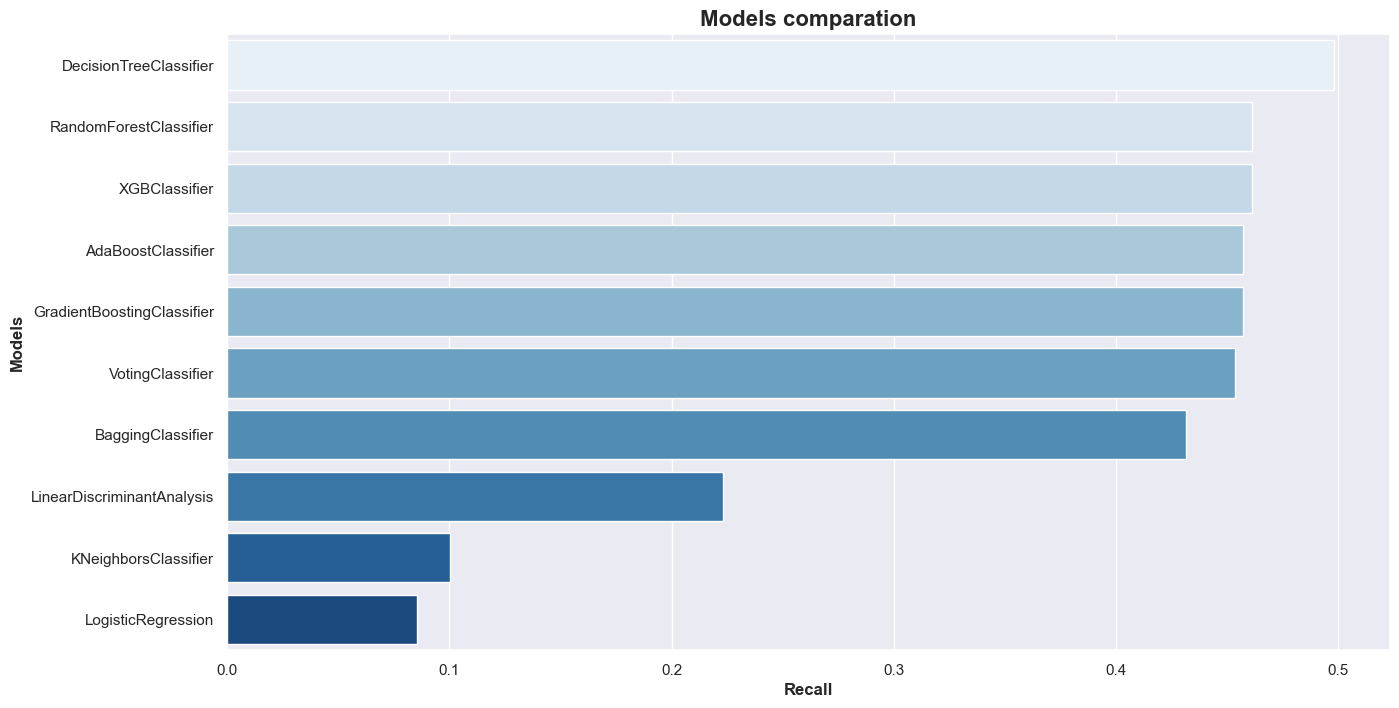

In [45]:
models_comparation(saved_metrics)

## Ajuste de hiperparámetros:

Con este apartado se pretende `mejorar estimadores` realizando el ***ajuste de hiperparámetros***.  

Se seleccionan los cuatro estimadores que han ido liderando la tabla de métricas y se realiza de nuevo su modelado buscando aquellos parámetros que puedan optimizar el modelo.

- En primer, lugar se ajustan los hiperparámetros utilizando el dataset al que se le ha realizado el feature selection.
- Se ajusta los hiperparámetros con el dataset al que se le ha realizado feature selection y balanceo SMOTE.
- Se ajustan los hiperparámetros con el dataset completo y el balanceo aplicado sobre el mismo con el método SMOTE.

In [46]:
mods = ['DTC', 'XGBC','GBC'] # Nota: no se usa el RandomForest por tiempo

for mod in mods:    
    models_generator(X_train_FS, y_train_FS, X_test_FS, y_test_FS,choose_models(mod,params=None),choose_params(mod),
    file_name='fs_metrics.csv',dir_file='model/model_metrics',dir_model_file='model',scaling=False,
    scoring = { "AUC": "roc_auc","Accuracy": make_scorer(accuracy_score), "Recall": make_scorer(recall_score)}, balancing = False)

Model DecisionTreeClassifier saved
<class 'list'>
Saved
fs_metrics.csv saved
Model XGBClassifier saved
Saved
fs_metrics.csv saved
Model GradientBoostingClassifier saved
Saved
fs_metrics.csv saved


In [47]:
saved_fs_metrics = pd.read_csv('model/model_metrics/fs_metrics.csv',sep=';').sort_values(by='Recall',ascending=False)
saved_fs_metrics

,model,params_tried,best_params,ACC,Precision,Recall,F1,ROC,Jaccard,model_path
0,DecisionTreeClassifier,"{'criterion': ['log_loss', 'gini', 'entropy'],...","{'class_weight': 'balanced', 'criterion': 'ent...",0.742969,0.421875,0.602230,0.496172,0.691323,0.329939,model/DecisionTreeClassifier_1.pkl
2,GradientBoostingClassifier,"[{'learning_rate': [0.1, 0.05, 0.01, 0.001], '...","{'criterion': 'friedman_mse', 'learning_rate':...",0.791406,0.503876,0.483271,0.493359,0.678332,0.327456,model/GradientBoostingClassifier.pkl
1,XGBClassifier,"{'nthread': [4], 'objective': ['binary:logisti...","{'colsample_bytree': 1.0, 'learning_rate': 0.0...",0.858594,0.761905,0.475836,0.585812,0.718136,0.414239,model/XGBClassifier.pkl


In [48]:
mods = ['DTC', 'XGBC'] # Nota: no se usa el RandomForest por tiempo

for mod in mods:    
    models_generator(X_train_FSSMOTE, y_train_FSSMOTE, X_test_FS, y_test_FS,choose_models(mod,params=None),choose_params(mod),
    file_name='fs_balanced_metrics.csv',dir_file='model/model_metrics',dir_model_file='model',scaling=False,
    scoring = { "AUC": "roc_auc","Accuracy": make_scorer(accuracy_score), "Recall": make_scorer(recall_score)}, balancing = False)

Model DecisionTreeClassifier saved
<class 'list'>
Saved
fs_balanced_metrics.csv saved
Model XGBClassifier saved
Saved
fs_balanced_metrics.csv saved


In [49]:
saved_fs_balanced_metrics = pd.read_csv('model/model_metrics/fs_balanced_metrics.csv',sep=';').sort_values(by='Recall',ascending=False)
saved_fs_balanced_metrics

,model,params_tried,best_params,ACC,Precision,Recall,F1,ROC,Jaccard,model_path
0,DecisionTreeClassifier,"{'criterion': ['log_loss', 'gini', 'entropy'],...","{'class_weight': 'balanced', 'criterion': 'gin...",0.757031,0.449275,0.691450,0.544656,0.732965,0.374245,model/DecisionTreeClassifier_2.pkl
1,XGBClassifier,"{'nthread': [4], 'objective': ['binary:logisti...","{'colsample_bytree': 1.0, 'learning_rate': 0.0...",0.794531,0.508475,0.669145,0.577849,0.748519,0.406321,model/XGBClassifier_1.pkl


In [52]:
mods = ['DTC','XGBC']

for mod in mods:    
    models_generator(X_train_SMOTE, y_train_SMOTE, X_val, y_val,choose_models(mod,params=None),choose_params(mod),
    file_name='metrics_balanced.csv',dir_file='model/model_metrics',dir_model_file='model',scaling = True,
    scoring = { "Accuracy": make_scorer(accuracy_score),"Recall": make_scorer(recall_score)}, balancing = True)

Model DecisionTreeClassifier saved
<class 'list'>
Saved
metrics_balanced.csv saved
Model XGBClassifier saved
Saved
metrics_balanced.csv saved


In [53]:
saved_balanced_metrics = pd.read_csv('model/model_metrics/metrics_balanced.csv',sep=';').sort_values(by='Recall',ascending=False)
saved_balanced_metrics

,model,params_tried,best_params,ACC,Precision,Recall,F1,ROC,Jaccard,model_path
1,XGBClassifier,"{'nthread': [4], 'objective': ['binary:logisti...","{'colsample_bytree': 0.6, 'learning_rate': 0.0...",0.79375,0.505721,0.659701,0.572539,0.744475,0.401089,model/XGBClassifier_2.pkl
0,DecisionTreeClassifier,"{'criterion': ['log_loss', 'gini', 'entropy'],...","{'class_weight': 'balanced', 'criterion': 'gin...",0.75375,0.437367,0.614925,0.511166,0.702720,0.343333,model/DecisionTreeClassifier_3.pkl


## Prueba con Perceptrón:

Se realiza una comprobación de la `posibilidad de usar una red neuronal`, como el perceptrón, para resolver este problema de clasificación.

In [ ]:
y_pred,metricas,estimator = baseline(X_train, y_train, X_val, y_val, base_model = MLPClassifier(), clf = True,file_name='DL_metrics.csv')

In [ ]:
y_pred,metricas,estimator = baseline(X_train_FS, y_train_FS, X_test_FS, y_test_FS, base_model = MLPClassifier(), clf = True,file_name='DL_metrics.csv')

In [16]:
mlp_metrics = pd.read_csv('model/model_metrics/DL_metrics.csv',sep=';').sort_values(by='Recall',ascending=False)
mlp_metrics

,model,features,ACC,Precision,Recall,F1,ROC,Jaccard
0,MLPClassifier,all,0.946875,0.788732,0.670659,0.724919,0.824862,0.568528
1,MLPClassifier,selected,0.920000,0.719101,0.383234,0.500000,0.682894,0.333333


Con esta prueba **`no`** se obtienen **`resultados`** *comparativamente* **`mejores`** que con los modelos anteriormente probados. 

Se ajustan los hiperparámetros como última prueba:

In [ ]:
params_mlp = {
    'activation': ['relu','logistic'],
    'early_stopping': [True],
    'hidden_layer_sizes': [(128,32,2)],
    'learning_rate': ['constant','invscaling','adaptive'],
    'learning_rate_init': [0.001,0.0005],
    'max_iter': [200,100],
 }

models_generator(df,target,MLPClassifier(),params_mlp,
file_name ='DL_metrics_hyp.csv',dir_file='model/model_metrics',dir_model_file='model',scaling=False,
scoring = { "AUC": "roc_auc","Accuracy": make_scorer(accuracy_score),'Precision': make_scorer(precision_score)})

In [15]:
mlp_metrics_hyparameters = pd.read_csv('model/model_metrics/DL_metrics_hyp.csv',sep=';').sort_values(by='Recall',ascending=False)
mlp_metrics_hyparameters

,model,params_tried,best_params,ACC,Precision,Recall,F1,ROC,Jaccard,model_path
1,MLPClassifier,"{'activation': ['relu', 'logistic'], 'early_st...","{'activation': 'relu', 'early_stopping': True,...",0.936875,0.858696,0.473054,0.610039,0.731991,0.438889,model/MLPClassifier.pkl
2,MLPClassifier,"{'activation': ['relu', 'logistic'], 'early_st...","{'activation': 'relu', 'early_stopping': True,...",0.940000,0.784000,0.586826,0.671233,0.783992,0.505155,model/MLPClassifier_2.pkl
0,MLPClassifier,"{'activation': ['relu'], 'early_stopping': [Tr...","{'activation': 'relu', 'early_stopping': True,...",0.933750,0.760684,0.532934,0.626761,0.756697,0.456410,model/MLPClassifier_1.pkl


<a href='3-Resultados.ipynb'>Ver siguiente notebook</a>